<a href="https://colab.research.google.com/github/paulovbpo/deep_learning_keras/blob/master/Deep_Learning_Keras_Classifica%C3%A7%C3%A3o_Roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

In [0]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((x_treino, y_treino),(x_teste,y_teste)) = dataset.load_data()

4423680/4422102 [==============================] - 1s 0us/step


# Exploração dos dados


In [3]:
len(x_treino)
len(x_teste)
x_treino.shape   #retorna a quantidade de elementos(imagens) da tupla, o numero de colunas, e o numero de linhas.
y_treino.min()
y_treino.max()

9

# Exibição dos dados

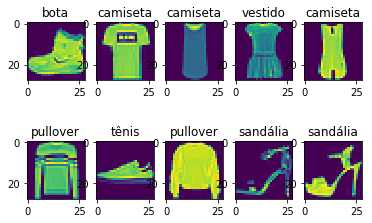

In [4]:
total_classificacoes = 10
nomes_classificacao = ['camiseta', 'calça', 'pullover', 'vestido', 'casaco', 'sandália', 'camisa', 'tênis', 'bolsa', 'bota']

for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(x_treino[imagem])
  plt.title(nomes_classificacao[y_treino[imagem]])

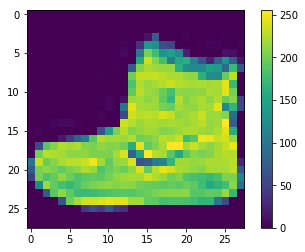

In [5]:
plt.imshow(x_treino[0])
plt.colorbar()   # mostra a gradação das cores de 0 a 255 pixels

# Normalização

In [0]:
x_treino = x_treino/float(255)  # em vez de passar 256 valores, passa valores decimais de 0 a 1

# Criando, Compilando e Treinando o modelo da RNA

In [39]:
# é usual contar o número de camadas sem levar em conta a de entrada, logo esse modelo teria 3 camadas apenas.
# ao tentar aumentar o numero de camadas ocultas aumentou o numero de perda(loss)
modelo = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), # camada de entrada que achata os 28x28 pixels das imagens em uma array de 784 pixels
                          keras.layers.Dense(256, activation = tensorflow.nn.relu),  # 1° camada oculta com 256 neurônios, passando uma função de ativação ReLU (uma função não linear)
                          keras.layers.Dropout(0.2), # 2° camada oculta, deixa 'adormecido' uma porcentagem de neurônios da camada oculta, serve para normalizar
                          keras.layers.Dense(10, activation = tensorflow.nn.softmax) # camada de saída, com 10 neurônios que é equivalente ao total de classificações, e softmax como função de ativação
])

#lr: learning rate - taxa de aprendizado/ o padrão é 0.001
adam = keras.optimizers.Adam(lr = 0.002)
# com 0.5 fica com uma perda muito alta e acurácia muito baixa

# O EarlyStopping quando atinge um limite de um determinado parâmetro é parado mais cedo o treinamento, para não precisar percorrer todas as épocas
parando_cedo = [keras.callbacks.EarlyStopping(monitor = 'val_loss'),
                keras.callbacks.ModelCheckpoint(filepath = 'melhor_modelo_hdf5',
                                                 modelo = 'val_loss', save_best_only = True)]
# O ModelCheckpoint serve para salvar a configuração do melhor modelo


# compilando
modelo.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # define os algoritmos do otimizador, do calculo do erro (perda), e da metrica de acerto.

# treinando 
historico = modelo.fit(x_treino, y_treino, batch_size = 480, epochs = 5, validation_split = 0.2, callbacks = parando_cedo) # treina, define o numero de épocas, e separa 20% para validação
# batch_size é quantidade de conjuntos treinados por vez, ajuda a diminuir o tempo de processamento

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 51us/sample - loss: 0.6569 - acc: 0.7686 - val_loss: 0.4511 - val_acc: 0.8444
Epoch 2/5
48000/48000 [==============================] - 2s 35us/sample - loss: 0.4391 - acc: 0.8453 - val_loss: 0.3998 - val_acc: 0.8589
Epoch 3/5
48000/48000 [==============================] - 2s 35us/sample - loss: 0.3907 - acc: 0.8601 - val_loss: 0.3816 - val_acc: 0.8609
Epoch 4/5
48000/48000 [==============================] - 2s 35us/sample - loss: 0.3657 - acc: 0.8688 - val_loss: 0.3570 - val_acc: 0.8702
Epoch 5/5
48000/48000 [==============================] - 2s 35us/sample - loss: 0.3403 - acc: 0.8766 - val_loss: 0.3448 - val_acc: 0.8780


**OBS: Hiperparâmetros são todos os parâmetros que se pode ajustar antes de treinar o modelo, exemplos: num de camadas, num de neurônios, lr, batch_size, épocas, etc..
Já os parâmetros são os pesos e bias.**

In [37]:
# retorna a configuração total do modelo
modelo.get_config()

{'layers': [{'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten_6',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros',
     'config': {'dtype': 'float32'}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'dtype': 'float32', 'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_12',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_6',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
   

# Sumário do Modelo

In [8]:
# resumo do modelo
sumario_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Pesos e Vieses(Bias)

In [9]:
# mostra os pesos da camada 1, que é a camada dense
# os pesos medem as características mais importantes do modelo
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.04649221,  0.07223742, -0.02309503, ..., -0.06324992,
        -0.00248838,  0.05805543],
       [-0.08416895,  0.05612224,  0.05520856, ...,  0.0504124 ,
        -0.00450379, -0.09692895],
       [ 0.22650722, -0.01623684,  0.0069731 , ..., -0.0560036 ,
        -0.02831468,  0.04965855],
       ...,
       [ 0.01320785, -0.04142103,  0.01924284, ...,  0.00300138,
        -0.04057437, -0.11139137],
       [ 0.15972628, -0.08690394, -0.0130431 , ...,  0.11551469,
        -0.08700916,  0.05525341],
       [ 0.19088398, -0.03837525,  0.04847915, ..., -0.03094795,
        -0.11170067, -0.22084352]], dtype=float32)

In [10]:
# mudando o índice de 0 para 1 passa a mostrar os vieses(bias) da mesma camada
# o bias mede a distância que falta para o resultado esperado
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([-5.67697398e-02,  1.47648022e-01,  1.63436607e-02,  2.15024680e-01,
       -6.12272397e-02,  3.47555012e-01,  3.80361937e-02, -1.04140207e-01,
       -6.52386458e-04,  3.45910907e-01,  1.02595806e-01,  1.63051903e-01,
        3.88310826e-03,  1.47293493e-01,  2.03892261e-01, -8.41406435e-02,
       -6.91583008e-02,  2.75191605e-01,  1.07785858e-01,  3.17068920e-02,
       -3.27494234e-01, -1.37351811e-01,  8.52490440e-02,  1.47780687e-01,
        3.42526108e-01,  9.47263986e-02,  1.32390454e-01, -1.21869324e-02,
       -1.35764703e-01,  8.54119807e-02,  2.70512283e-01,  2.94769645e-01,
        3.26178461e-01, -1.52565576e-02,  1.46273971e-01,  2.94320047e-01,
        1.67865708e-01,  3.97461623e-01, -5.86667918e-02, -1.10172324e-01,
        1.57071561e-01,  1.24326073e-01,  7.18928277e-02,  4.36491929e-02,
        4.84676242e-01,  2.18184572e-02,  1.71036776e-02, -2.29182001e-02,
        1.90284416e-01,  1.10772885e-01, -1.83138371e-01, -2.40752380e-02,
        1.84144482e-01,  

**Obs: quando a rede esta errando os valores propagados serão recalculados e assim, por ter errado, o peso será diminuido e o viés aumentado, já que vai ter se afastado do resultado ideal.**

# Salvando e Carregando o Modelo

In [11]:
modelo.save('rna_alura.h5')  # salvar no formato h5
modelo_salvo = load_model('rna_alura.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Gráfico do Histórico da Acurácia

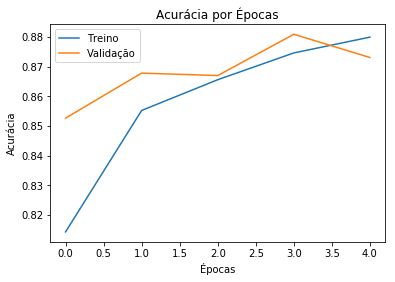

In [12]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])

# Gráfico do Histórico da Perda

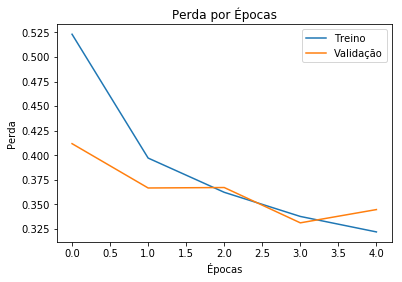

In [13]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino','Validação'])

# Testando o Modelo

In [14]:
testes = modelo.predict(x_teste)
modelo.evaluate(x_teste,y_teste)


10000/10000 [==============================] - 0s 41us/sample - loss: 65.5461 - acc: 0.8411


[65.54608510878086, 0.8411]

# Testando Com Pesos Zerados
**Obs: Apenas para aprender, não vale a pena zera-los**

In [15]:
pesos_camada_dense.shape

(784, 256)

In [16]:
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_zerados

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])

modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([-5.67697398e-02,  1.47648022e-01,  1.63436607e-02,  2.15024680e-01,
        -6.12272397e-02,  3.47555012e-01,  3.80361937e-02, -1.04140207e-01,
        -6.52386458e-04,  3.45910907e-01,  1.02595806e-01,  1.63051903e-01,
         3.88310826e-03,  1.47293493e-01,  2.03892261e-01, -8.41406435e-02,
        -6.91583008e-02,  2.75191605e-01,  1.07785858e-01,  3.17068920e-02,
        -3.27494234e-01, -1.37351811e-01,  8.52490440e-02,  1.47780687e-01,
         3.42526108e-01,  9.47263986e-02,  1.32390454e-01, -1.21869324e-02,
        -1.35764703e-01,  8.54119807e-02,  2.70512283e-01,  2.94769645e-01,
         3.26178461e-01, -1.52565576e-02,  1.46273971e-01,  2.94320047e-01,
         1.67865708e-01,  3.97461623e-01, -5.8666791

In [18]:
modelo.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy']) 

historico = modelo.fit(x_treino, y_treino, epochs = 5, validation_split = 0.2) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 107us/sample - loss: 0.5278 - acc: 0.8100 - val_loss: 0.4115 - val_acc: 0.8472
Epoch 2/5
48000/48000 [==============================] - 5s 107us/sample - loss: 0.4043 - acc: 0.8520 - val_loss: 0.3874 - val_acc: 0.8546
Epoch 3/5
48000/48000 [==============================] - 5s 104us/sample - loss: 0.3719 - acc: 0.8632 - val_loss: 0.3730 - val_acc: 0.8654
Epoch 4/5
48000/48000 [==============================] - 5s 103us/sample - loss: 0.3508 - acc: 0.8709 - val_loss: 0.3404 - val_acc: 0.8768
Epoch 5/5
48000/48000 [==============================] - 5s 111us/sample - loss: 0.3329 - acc: 0.8770 - val_loss: 0.3391 - val_acc: 0.8790


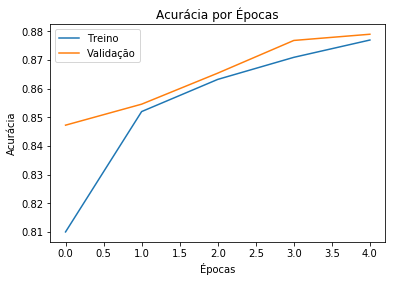

In [19]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])

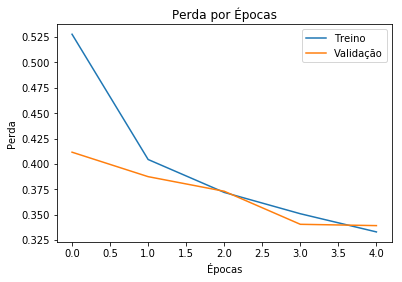

In [20]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino','Validação'])

# Testando com Valores Aleatórios nos Pesos
**Obs: Apenas para aprender, não vale a pena deixa-los aleatórios**

In [21]:
pesos_camada_dense_aleatorios = np.random.rand(784, 256)
pesos_camada_dense_aleatorios

array([[0.07400211, 0.64605226, 0.55313022, ..., 0.34216692, 0.00913578,
        0.1872681 ],
       [0.4416164 , 0.54591081, 0.12892996, ..., 0.92501676, 0.94544556,
        0.97022025],
       [0.68128204, 0.63756246, 0.14501729, ..., 0.56693501, 0.16532256,
        0.25375323],
       ...,
       [0.56785868, 0.62093872, 0.74734968, ..., 0.49495583, 0.35161489,
        0.54967078],
       [0.56774034, 0.34356439, 0.21903563, ..., 0.96762395, 0.14938226,
        0.69307746],
       [0.57825359, 0.07803585, 0.67088946, ..., 0.08699651, 0.14742408,
        0.75372012]])

In [22]:
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

modelo.layers[1].get_weights()

[array([[0.07400211, 0.64605224, 0.5531302 , ..., 0.34216693, 0.00913578,
         0.18726811],
        [0.44161642, 0.54591084, 0.12892996, ..., 0.92501676, 0.94544554,
         0.97022027],
        [0.68128204, 0.63756245, 0.14501728, ..., 0.566935  , 0.16532257,
         0.25375322],
        ...,
        [0.5678587 , 0.6209387 , 0.7473497 , ..., 0.49495584, 0.3516149 ,
         0.54967076],
        [0.5677403 , 0.3435644 , 0.21903563, ..., 0.96762395, 0.14938226,
         0.69307745],
        [0.57825357, 0.07803585, 0.67088944, ..., 0.08699651, 0.14742409,
         0.7537201 ]], dtype=float32),
 array([-5.67697398e-02,  1.47648022e-01,  1.63436607e-02,  2.15024680e-01,
        -6.12272397e-02,  3.47555012e-01,  3.80361937e-02, -1.04140207e-01,
        -6.52386458e-04,  3.45910907e-01,  1.02595806e-01,  1.63051903e-01,
         3.88310826e-03,  1.47293493e-01,  2.03892261e-01, -8.41406435e-02,
        -6.91583008e-02,  2.75191605e-01,  1.07785858e-01,  3.17068920e-02,
        -3.274

In [23]:
modelo.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy']) 

historico = modelo.fit(x_treino, y_treino, epochs = 5, validation_split = 0.2) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 107us/sample - loss: 117.9314 - acc: 0.4104 - val_loss: 16.7461 - val_acc: 0.7261
Epoch 2/5
48000/48000 [==============================] - 5s 107us/sample - loss: 31.3853 - acc: 0.6274 - val_loss: 9.8167 - val_acc: 0.7648
Epoch 3/5
48000/48000 [==============================] - 6s 116us/sample - loss: 14.5720 - acc: 0.6927 - val_loss: 6.4944 - val_acc: 0.7692
Epoch 4/5
48000/48000 [==============================] - 6s 116us/sample - loss: 7.5801 - acc: 0.7221 - val_loss: 3.9525 - val_acc: 0.7870
Epoch 5/5
48000/48000 [==============================] - 6s 115us/sample - loss: 4.0189 - acc: 0.7540 - val_loss: 3.1688 - val_acc: 0.7712


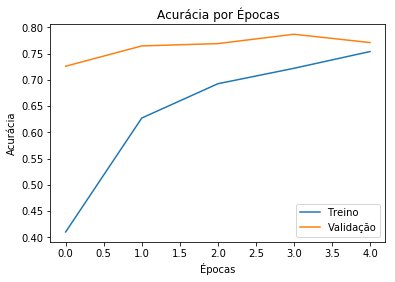

In [24]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])

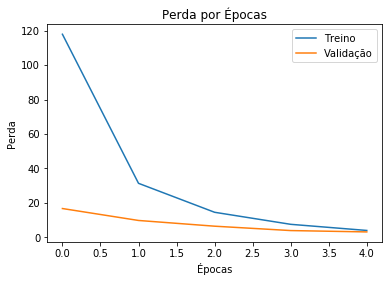

In [25]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino','Validação'])

# Testanto com Pesos e Viéses Zerados/Aleatórios
**Percebe-se que os pesos tem maior influência na rede**

In [26]:
vieses_camada_dense.shape

(256,)

In [27]:
vieses_camada_dense_zerados = np.zeros((256,))

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense_zerados])

modelo.layers[1].get_weights()


[array([[0.07400211, 0.64605224, 0.5531302 , ..., 0.34216693, 0.00913578,
         0.18726811],
        [0.44161642, 0.54591084, 0.12892996, ..., 0.92501676, 0.94544554,
         0.97022027],
        [0.68128204, 0.63756245, 0.14501728, ..., 0.566935  , 0.16532257,
         0.25375322],
        ...,
        [0.5678587 , 0.6209387 , 0.7473497 , ..., 0.49495584, 0.3516149 ,
         0.54967076],
        [0.5677403 , 0.3435644 , 0.21903563, ..., 0.96762395, 0.14938226,
         0.69307745],
        [0.57825357, 0.07803585, 0.67088944, ..., 0.08699651, 0.14742409,
         0.7537201 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [28]:
modelo.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy']) 

historico = modelo.fit(x_treino, y_treino, epochs = 5, validation_split = 0.2) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 113us/sample - loss: 35.8085 - acc: 0.4098 - val_loss: 9.9257 - val_acc: 0.5891
Epoch 2/5
48000/48000 [==============================] - 5s 108us/sample - loss: 10.4428 - acc: 0.5805 - val_loss: 3.8403 - val_acc: 0.7072
Epoch 3/5
48000/48000 [==============================] - 6s 115us/sample - loss: 5.7435 - acc: 0.6413 - val_loss: 2.9794 - val_acc: 0.7135
Epoch 4/5
48000/48000 [==============================] - 5s 114us/sample - loss: 3.7288 - acc: 0.6840 - val_loss: 2.2345 - val_acc: 0.7416
Epoch 5/5
48000/48000 [==============================] - 5s 113us/sample - loss: 2.1932 - acc: 0.7210 - val_loss: 1.5682 - val_acc: 0.7563


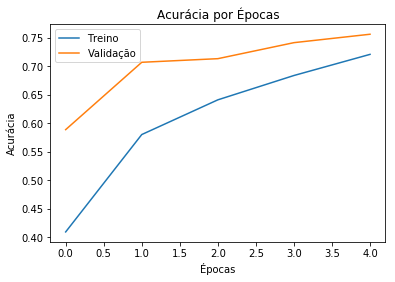

In [29]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])